<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/AL21Test_AugTest_Plus_Save.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# torch dataset인 cifar10은, 낱개로 다루기 번거로움
# 대신 cifar2png 사용하여 준비

!pip install cifar2png

  Created wheel for cifar2png: filename=cifar2png-0.0.4-cp37-none-any.whl size=5935 sha256=586adee3a66d6bf251ffb540071ed2c2a811ff525fe52e3d63e12f4935ef96c2
  Stored in directory: /root/.cache/pip/wheels/88/74/1b/879adc36940e0e572a5999df305d325778a460cbfd6555a981
Successfully built cifar2png


In [ ]:
'''
structure

train/
  airplane/
    001.png
    002.png
    ...
  automobile/
    001.png
    002.png
    ...
'''

cifar_dir = './cifar10'
!cifar2png cifar10 cifar10

cifar-10-python.tar.gz does not exists.
167kKB [00:04, 39.4kKB/s]              
Saving train images: 100% 50000/50000 [00:20<00:00, 2395.68it/s]
Saving test images: 100% 10000/10000 [00:04<00:00, 2429.11it/s]


In [ ]:

import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from tqdm import tqdm

# first, list the categories available in the data
data_dir = os.path.join(cifar_dir, "train")
categories = os.listdir(data_dir)
categories.sort()
print(categories)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# next load the images and labels
images = []
labels = []
for label_id, category in tqdm(enumerate(categories), total=len(categories)):
    category_dir = os.path.join(data_dir, category)
    image_names = os.listdir(category_dir)
    for im_name in image_names:
        im_file = os.path.join(category_dir, im_name)
        images.append(imread(im_file))
        labels.append(label_id)
        
# make numpy arrays out of the lists
# for th images, we stack along a new first axis
images = np.concatenate([im[None] for im in images], axis=0)
labels = np.array(labels)

print("Number of images:", len(images))
print("Number of labels:", len(labels))

100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


Number of images: 50000
Number of labels: 50000


5000


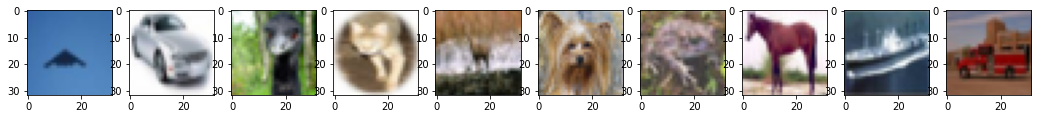

In [ ]:
# plot one image for each category
fig, ax = plt.subplots(1, 10, figsize=(18, 6))
label_list = labels.tolist()
#print(label_list.index(1))
for label_id, category in enumerate(categories):
    ax[label_id].imshow(images[label_list.index(label_id)])
    # ax[label_id].set_title(category)
plt.show()

In [29]:
rc_path = './cirar10_rc/'

if not os.path.exists(rc_path):
  os.mkdir(rc_path)

In [41]:
import PIL
#from PIL import PILImage

import torchvision.transforms as T
import torchvision.transforms.functional as F
import torch


for label_id, category in tqdm(enumerate(categories), total=len(categories)):
    category_dir = os.path.join(data_dir, category)
    image_names = os.listdir(category_dir)
    for cnt, im_name in enumerate(image_names):
        im_file = os.path.join(category_dir, im_name)
        img = PIL.Image.open(im_file)
        tensor = F.to_tensor(img)
        tr = F.hflip(img)
        img = F.to_pil_image(tr)
        in_parts = im_name.split('.')
        img.save(rc_path + f'{')

        if cnt > 0:
            break

100%|██████████| 10/10 [00:00<00:00, 358.83it/s]


In [35]:
from PIL import PILImage

import torchvision.transforms as T
import torchvision.transforms.functional as F
import torch


#albumentations.Cutout(1,16,16,True),

%%time

for label_id, category in tqdm(enumerate(categories), total=len(categories)):
    category_dir = os.path.join(data_dir, category)
    image_names = os.listdir(category_dir)
    for cnt, im_name in enumerate(image_names):
        #im_file = os.path.join(category_dir, im_name)
        img = PILImage.open(category_dir + im_name)
        
        '''
        tensor = F.to_tensor(img)
        tr = F.hflip(img)
        #tr = F.crop(tensor, 192, 192, 192, 192)
        #tr = F.resize(tr, [64, 64])
        img = F.to_pil_image(tr)
        in_parts = im_name.split('.')
        img.save(rc_path + f'{i}-ER-{regr}.png')
        counts[f'ER-{regr}'] = counts.get(f'ER-{regr}', 0) + 1
        i += 1
        ''' 

        if cnt > 0:
            break


counts = dict()
i = 0
for filename in os.listdir(er_trdat_path):
    fn_parts = filename.split('_')
    ind =  fn_parts.index('ER')
    regr = fn_parts[ind+1]
    if regr not in {'1', '3', '6', '10', '20', '30'}:
        print(f'error fn_parts[7]')
        print(fn_parts)
        print(filename)
        break    
    img = Image.open(er_trdat_path + filename)
    tensor = F.to_tensor(img)
    tr = F.crop(tensor, 192, 192, 192, 192)
    tr = F.resize(tr, [64, 64])
    img = F.to_pil_image(tr)
    img.save(cropdat_path + f'{i}-ER-{regr}.png')
    counts[f'ER-{regr}'] = counts.get(f'ER-{regr}', 0) + 1
    i += 1
for filename in os.listdir(nr_trdat_path):
    fn_parts = filename.split('_')
    ind =  fn_parts.index('NR')
    regr = fn_parts[ind+1]
    if regr not in {'1', '3', '6', '10', '20', '30'}:
        print(f'error fn_parts[7]')
        print(fn_parts)
        print(filename)
        break    
    img = Image.open(nr_trdat_path + filename)
    tensor = F.to_tensor(img)
    tr = F.crop(tensor, 192, 192, 192, 192)
    tr = F.resize(tr, [64, 64])
    img = F.to_pil_image(tr)
    img.save(rc_path + f'{i}-NR-{regr}.png')
    counts[f'NR-{regr}'] = counts.get(f'NR-{regr}', 0) + 1
    i += 1

SyntaxError: ignored

In [ ]:
class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

In [ ]:
import torch
# datasets have to be sub-classes from torch.util.data.Dataset
from torch.utils.data import Dataset

class DatasetWithTransform(Dataset):
    """ Our minimal dataset class. It holds data and target
    as well as optional transforms that are applied to the data and target
    on the fly when a batch is requested via the [] operator.
    """
    def __init__(self, data, target, transform=None):
        assert isinstance(data, np.ndarray)
        assert isinstance(target, np.ndarray)
        self.data = data
        self.target = target
        if transform is not None:
            assert callable(transform)
        self.transform = transform

    # exposes the [] operator of our class
    def __getitem__(self, index):
        data, target = self.data[index], self.target[index]

        # if we have transformations, apply them to the data and target
        if self.transform is not None:
            data, target = self.transform(data, target)
        return data, target

    def __len__(self):
        return self.data.shape[0]

In [ ]:
# what transofrmations do we need to feed this data to pytorch?

# first, let's check the shape of our images:
image = images[0]
print(image.shape)

(32, 32, 3)


In [ ]:

# as we see, the images are stored in the order width, height, channel (WHC), 
# i.e. the first two axes are the image axes and the last axis
# corresponds to the color channel.
# pytorch however expects the color channel as first axis, i.e. CWH.
# so our first transform switches the chanels

# note that we have implemented the dataset in such a way, that the transforms
# are functions that take bot the data (or image) and target as parameters.
# thus we here accept the target (which is just the class label for the image) 
# as second parameter and return it without changing it
def to_channel_first(image, target):
    """ Transform images with color channel last (WHC) to channel first (CWH)
    """
    # put channel first
    image = image.transpose((2, 0, 1))
    return image, target


In [ ]:
# next, let's see what datatype and value range our images have
print(image.dtype)
print(image.min(), image.max())

uint8
11 196


In [ ]:
# as we can see, the images are stored as 8 bit integers with a value range [0, 255]
# instead, torch expects images as 32 bit floats that should also be normalized to a 'reasonable' data range.
# here, we normalize the image such that all channels are in range 0 to 1
def normalize(image, target, channel_wise=True):
    eps = 1.e-6
    image = image.astype('float32')
    chan_min = image.min(axis=(1, 2), keepdims=True)
    image -= chan_min
    chan_max = image.max(axis=(1, 2), keepdims=True)
    image /= (chan_max + eps)
    return image, target


# finally, we need to transform the input from a numpy array to a torch tensor
# and also return the target (which in our case is a scalar) as a tensor
def to_tensor(image, target):
    return torch.from_numpy(image), torch.tensor([target], dtype=torch.int64)
    

# we also need a way to apply multiple transforms
# (note that alternatively we could also have accepted a list of transforms
# in DatasetWithTransform)
def compose(image, target, transforms):
    for trafo in transforms:
        image, target = trafo(image, target)
    return image, target

In [ ]:
# create the dataset with the transformations
from functools import partial  # to bind function arguments

trafos = [to_channel_first, normalize, to_tensor]
trafo = partial(compose, transforms=trafos)

dataset = DatasetWithTransform(images, labels, transform=trafo)

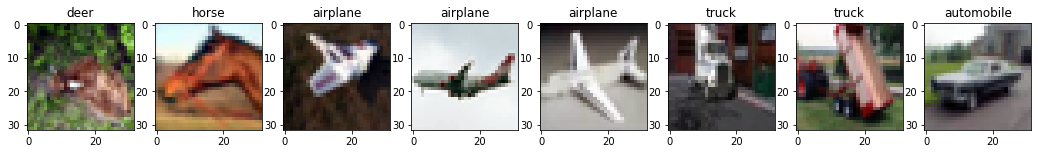

In [ ]:
def show_image(ax, image, target):
    # need to go back to numpy array and WHC axis order
    image = image.numpy().transpose((1, 2, 0))
    # find the label name
    label = categories[target.item()]
    ax.imshow(image)
    ax.set_title(label)

    
# sample a few images from the dataset and check their label
n_images = len(dataset)
n_samples = 8

fig, ax = plt.subplots(1, n_samples, figsize=(18, 4))
for sample in range(n_samples):
    # datasets are random access, so we can request
    # an image / target at an arbitrary index
    sample_id = np.random.randint(0, n_images)
    image, target = dataset[sample_id]
    
    # make sure that the image is in range 0, 1
    assert np.isclose(image.min(), 0.)
    assert np.isclose(image.max(), 1.)
    
    # add the image to our plots
    show_image(ax[sample], image, target)

In [ ]:
# albumentations.Cutout(1,16,16,True),



In [ ]:
from datetime import datetime
import datetime
print("Current Date/Time: ",  datetime.datetime.now())

Current Date/Time:  2021-04-26 05:22:07.201174


In [ ]:
import numpy as np
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

from albumentations.pytorch import ToTensor

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

label2index = dict([(label, n) for n, label in enumerate(labels)])
index2label = dict(enumerate(labels))


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
#import albumentations
from torch.utils.data import DataLoader, Dataset

train_transform = transforms.Compose(
    [
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]
)

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]
)

class CIFAR10Dataset(Dataset):
    def __init__(self, image, augmentations = None):
        super().__init__()

        self.image = image
        self.augmentations = augmentations

    def __len__(self):
        return len(self.image) # return 1 as we have only one image

    def __getitem__(self, idx):
      
       images,labels=self.image[idx]
       data = {"image":np.array(images,dtype=float)}
       if self.augmentations is not None:
          image = self.augmentations(**data)['image']
          image=torch.tensor(image)
          image=np.transpose(image,(2,1,0))
          return image,labels


train_ds = CIFAR10Dataset(image = trainset, augmentations = train_transform)
test_ds = CIFAR10Dataset(image = testset, augmentations = test_transform)

batch_size = 64

trainloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)


In [ ]:
# get some random training images
dataiter = iter(trainloader)
dataiter

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)

dataiter

images, classes = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % labels[classes[j]] for j in range(4)))

TypeError: ignored

<Figure size 864x864 with 0 Axes>

In [ ]:

import albumentations


def album_transform(albumentations):
    train_transforms = albumentations.Compose([
                                       albumentations.RandomRotate90(),
                                       albumentations.HorizontalFlip(),
                                       albumentations.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
                                       #albumentations.GridDistortion(num_steps=5),
                                       albumentations.augmentations.transforms.Normalize((0.4914, 0.48216, 0.4453), (0.24703, 0.24349, 0.26159))
                                         ])
 
    test_transforms=albumentations.Compose([albumentations.augmentations.transforms.Normalize((0.4914, 0.48216, 0.4453), (0.24703, 0.24349, 0.26159))])
    return train_transforms,test_transforms

train_transforms,test_transforms=album_transform(albumentations)    

In [ ]:
import albumentations

class Albumentation():
    def __init__(self):
        self.Albumentation_transform = albumentations.Compose([
                albumentations.PadIfNeeded(40,40,cv2.BORDER_REFLECT,True),
                albumentations.RandomCrop(32,32,True),                                         
                albumentations.HorizontalFlip(p=0.5),
                #albumentations.RandomRotate90(True),
                #albumentations.Rotate(-20,20),
                albumentations.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
                albumentations.Cutout(1,16,16,True),
                ToTensor(),
            ])
   
         
    def __call__(self,image):
        image_numpy = np.array(image)
        augmented = self.Albumentation_transform(image=image_numpy)
        image = augmented['image']
        return image    

In [ ]:
import numpy as np
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

from albumentations.pytorch import ToTensor


# ToTensor converts the PIL Image from range [0, 255] to a FloatTensor of shape (C x H x W) with range [0.0, 1.0]
# We then renormalize the input to [-1, 1] based on the following formula with μ and standard deviation

train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]
)

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ]
)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)


# Train set with albumentation
trainset_with_Albumentation = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=Albumentation())


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)


labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
label2index = dict([(label, n) for n, label in enumerate(labels)])
index2label = dict(enumerate(labels))


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)


dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

dataloader_args_Albumentation = dict(shuffle=True, batch_size=4, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)


# train dataloader
train_loader = torch.utils.data.DataLoader(trainset, **dataloader_args)


train_loader_Albumentation = torch.utils.data.DataLoader(trainset_with_Albumentation, **dataloader_args)

# To view images
train_loader_Alb = torch.utils.data.DataLoader(trainset_with_Albumentation, **dataloader_args_Albumentation)

# test dataloader
test_loader = torch.utils.data.DataLoader(testset, **dataloader_args)


CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 deer   car horse   dog


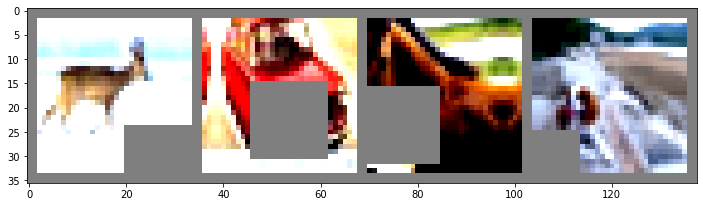

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader_Alb)
images, classes = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % labels[classes[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.preplayer = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, bias=False),                                             
                                       nn.BatchNorm2d(64),
                                       nn.ReLU())      # Receptive Field 3
                                                     
 #Layer 1 :         

        self.x1 = nn.Sequential(nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, bias=False), 
                                # Receptive Field  5                                         
                                nn.MaxPool2d(2, 2),
                                nn.BatchNorm2d(128),
                                nn.ReLU())            # Receptive Field 6

#ResBlock 1 :
            
    
        self.R1 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, bias=False),      
                                nn.BatchNorm2d(128),
                                nn.ReLU(),           # Receptive Field 10
                                nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, bias=False), 
                                nn.BatchNorm2d(128),
                                nn.ReLU())           # Receptive Field 14

           
            
            
#Layer 2 :


        self.x2 = nn.Sequential(nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, bias=False),
                                # Receptive Field 18
                                nn.MaxPool2d(2, 2),
                                nn.BatchNorm2d(256),
                                nn.ReLU())         # Receptive Field 20

           
                    
        
#Layer 3 :


        self.x3 = nn.Sequential(nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, bias=False), 
                                # Receptive Field 28
                                nn.MaxPool2d(2, 2),
                                nn.BatchNorm2d(512),
                                nn.ReLU())       # Receptive Field 32
 
            
 #ResBlock 2 :       
            

        self.R2 = nn.Sequential(nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, bias=False), 
                                nn.BatchNorm2d(512),
                                nn.ReLU(),       # Receptive Field 48
                                nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, bias=False), 
                                nn.BatchNorm2d(512),
                                nn.ReLU())       # Receptive Field 64

          
        
        self.pool = nn.MaxPool2d(4)          # Receptive Field 88

        self.fc = nn.Linear(in_features = 512, out_features = 10,bias=False)

      


    def forward(self, x):

        preplayer = self.preplayer(x)  # Receptive Field 3
        x = self.x1(preplayer)         # Receptive Field 6
        R = self.R1(x)                 # Receptive Field 14
        x = x+R                        
        x = self.x2(x)                 # Receptive Field 20 , 14 , 6
        x = self.x3(x)                 # Receptive Field 32 , 20 , 14 , 6   
        R = self.R2(x)                 # Receptive Field 64 , 32 , 20 , 14 , 6 
        x = R+x                          
        x = self.pool(x)               # Receptive Field 88 , 64 , 32 , 20 , 14 , 6      
        x = x.view(-1, 512)               
        x = self.fc(x)                       

        return F.log_softmax(x,dim=-1)

In [ ]:
import torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [ ]:


from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# %matplotlib inline
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torchvision.transforms as transforms
import albumentations
from albumentations.pytorch import ToTensor
from tqdm import tqdm

train_acc = []
train_losses = []
def train(model, device, train_loader, optimizer, loss_func, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  train_loss = 0
  for batch_idx, (data, target) in enumerate(pbar):
        # get the inputs
        data, target = data.to(device), target.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # predict
        y_pred = model(data)

        # loss
        loss = loss_func(y_pred, target)
        
        # backprop
        loss.backward()
        optimizer.step()

        # update pbar tqdm
        pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        train_loss += loss.item()

        pbar.set_description(desc= f'Epoch= {epoch} Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
  
  train_loss /= len(train_loader)
  train_losses.append(train_loss)
  train_acc.append(100*correct/processed)

In [ ]:
test_losses = []
test_acc = []
misclassified = []
correct_pics = []
def test(model, device, test_loader, loss_func, last_epoch):
    model.eval()
    correct = 0
    test_loss = 0                                   
    with torch.no_grad():
        for data, target in test_loader:
            img_batch = data
            data, target = data.to(device), target.to(device)  # Get samples
            output = model(data)  # Get trained model output
            test_loss += loss_func(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=False)  # Get the index of the max log-probability
            result = pred.eq(target.view_as(pred))

            if last_epoch:
              for i in range(len(list(result))):
                if not list(result)[i] and len(misclassified) < 25:
                  misclassified.append({
                      'prediction': list(pred)[i],
                      'label': list(target.view_as(pred))[i],
                      'image': img_batch[i]})
                
                elif list(result)[i] and len(correct_pics) < 25:
                  correct_pics.append({
                      'prediction': list(pred)[i],
                      'label': list(target.view_as(pred))[i],
                      'image': img_batch[i]

                        })


            correct += result.sum().item()

            
          

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    test_acc.append(100. * correct / len(test_loader.dataset))
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    


def test_class_performance(model, device, test_loader, classes):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        pbar = tqdm(test_loader)
        for i, (data, target) in enumerate(pbar):
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == target).squeeze()
            for i in range(4):
                label = target[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
from torch.optim.lr_scheduler import OneCycleLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01 , momentum=0.9, weight_decay=0.005) 
#scheduler = ReduceLROnPlateau(optimizer, patience = 3,min_lr=1e-4)
scheduler = OneCycleLR(optimizer,max_lr = 0.04006 ,total_steps=None,epochs=24,steps_per_epoch=1,pct_start=0.208,anneal_strategy="linear",cycle_momentum=False,base_momentum=0.85,max_momentum=0.95,div_factor=10.0,final_div_factor=1)
loss_func=nn.CrossEntropyLoss()
LR = []
for epoch in range(24):
   
    lr = optimizer.param_groups[0]['lr']
    LR.append(lr)
    print("Epoch:", epoch ," LR: ", lr)
    train(model, device, train_loader_Albumentation, optimizer, loss_func, epoch)
    # scheduler.step()
    test(model, device, test_loader, loss_func, last_epoch=True)
   # scheduler.step(test10.test_losses[-1])
    scheduler.step()

  0%|          | 0/98 [00:00<?, ?it/s]

Epoch: 0  LR:  0.004006


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Epoch= 0 Loss=1.3581033945083618 Batch_id=97 Accuracy=41.22: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5348/10000 (53.48%)

Epoch: 1  LR:  0.013037563126252504


Epoch= 1 Loss=1.2093836069107056 Batch_id=97 Accuracy=47.44: 100%|██████████| 98/98 [00:24<00:00,  4.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6152/10000 (61.52%)

Epoch: 2  LR:  0.022069126252505004


Epoch= 2 Loss=0.8835867047309875 Batch_id=97 Accuracy=60.02: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6808/10000 (68.08%)

Epoch: 3  LR:  0.03110068937875751


Epoch= 3 Loss=0.8788419365882874 Batch_id=97 Accuracy=66.13: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 6782/10000 (67.82%)

Epoch: 4  LR:  0.04004482575757576


Epoch= 4 Loss=0.8498335480690002 Batch_id=97 Accuracy=69.83: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 7191/10000 (71.91%)

Epoch: 5  LR:  0.038148045454545455


Epoch= 5 Loss=0.609292209148407 Batch_id=97 Accuracy=74.58: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 7821/10000 (78.21%)

Epoch: 6  LR:  0.03625126515151515


Epoch= 6 Loss=0.5747907161712646 Batch_id=97 Accuracy=77.62: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8159/10000 (81.59%)

Epoch: 7  LR:  0.03435448484848485


Epoch= 7 Loss=0.6242859959602356 Batch_id=97 Accuracy=79.36: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7759/10000 (77.59%)

Epoch: 8  LR:  0.032457704545454547


Epoch= 8 Loss=0.5662239193916321 Batch_id=97 Accuracy=81.15: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8345/10000 (83.45%)

Epoch: 9  LR:  0.030560924242424244


Epoch= 9 Loss=0.4610883593559265 Batch_id=97 Accuracy=82.60: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8304/10000 (83.04%)

Epoch: 10  LR:  0.02866414393939394


Epoch= 10 Loss=0.49857133626937866 Batch_id=97 Accuracy=83.50: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8582/10000 (85.82%)

Epoch: 11  LR:  0.026767363636363634


Epoch= 11 Loss=0.41805389523506165 Batch_id=97 Accuracy=84.49: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8616/10000 (86.16%)

Epoch: 12  LR:  0.024870583333333335


Epoch= 12 Loss=0.47084781527519226 Batch_id=97 Accuracy=85.25: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8565/10000 (85.65%)

Epoch: 13  LR:  0.022973803030303032


Epoch= 13 Loss=0.4188336431980133 Batch_id=97 Accuracy=86.00: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8491/10000 (84.91%)

Epoch: 14  LR:  0.02107702272727273


Epoch= 14 Loss=0.34866780042648315 Batch_id=97 Accuracy=86.97: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8293/10000 (82.93%)

Epoch: 15  LR:  0.019180242424242423


Epoch= 15 Loss=0.3803008496761322 Batch_id=97 Accuracy=87.53: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8554/10000 (85.54%)

Epoch: 16  LR:  0.017283462121212123


Epoch= 16 Loss=0.3101869225502014 Batch_id=97 Accuracy=87.83: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0007, Accuracy: 8785/10000 (87.85%)

Epoch: 17  LR:  0.01538668181818182


Epoch= 17 Loss=0.36562591791152954 Batch_id=97 Accuracy=88.94: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8658/10000 (86.58%)

Epoch: 18  LR:  0.013489901515151517


Epoch= 18 Loss=0.28751668334007263 Batch_id=97 Accuracy=89.45: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8925/10000 (89.25%)

Epoch: 19  LR:  0.011593121212121214


Epoch= 19 Loss=0.3433779180049896 Batch_id=97 Accuracy=90.26: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9003/10000 (90.03%)

Epoch: 20  LR:  0.009696340909090911


Epoch= 20 Loss=0.2631487548351288 Batch_id=97 Accuracy=91.03: 100%|██████████| 98/98 [00:25<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 8962/10000 (89.62%)

Epoch: 21  LR:  0.0077995606060606085


Epoch= 21 Loss=0.291852742433548 Batch_id=97 Accuracy=91.89: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0006, Accuracy: 9021/10000 (90.21%)

Epoch: 22  LR:  0.0059027803030303055


Epoch= 22 Loss=0.23807764053344727 Batch_id=97 Accuracy=92.73: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0005, Accuracy: 9205/10000 (92.05%)

Epoch: 23  LR:  0.004006000000000003


Epoch= 23 Loss=0.17388902604579926 Batch_id=97 Accuracy=93.83: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]



Test set: Average loss: 0.0004, Accuracy: 9246/10000 (92.46%)



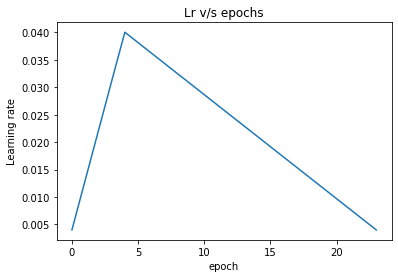

In [ ]:
plt.plot(LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()

In [ ]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(test_loader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1
for i in range(10):
  print('Accuracy of %5s : %2d %%' % (labels[i], 100 * class_correct[i] / class_total[i]))

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 20/20 [00:02<00:00,  9.14it/s]

Accuracy of plane : 100 %
Accuracy of   car : 100 %
Accuracy of  bird : 75 %
Accuracy of   cat : 60 %
Accuracy of  deer : 100 %
Accuracy of   dog : 83 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 88 %


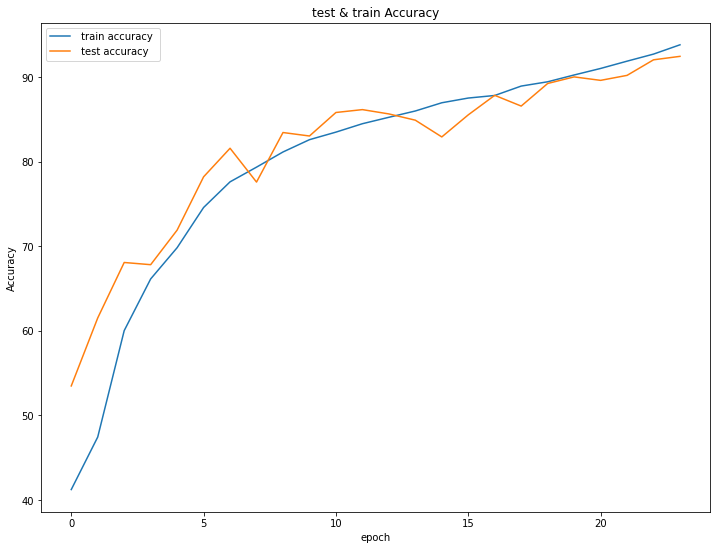

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(12,9))
plt.plot(train_acc)
plt.plot(test_acc)

plt.title('test & train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend([" train accuracy ", ' test accuracy '], loc='best')
plt.show()